<center><h1 style="color:#173F8A;"> Metodos para Ecuaciones Diferenciales, IMT3410, 2024-2 </h1></center>
<h3 style="color:#173F8A;text-align:right;"> Instituto de Ingenieria Matematica y Computacional<br>  Pontificia Universidad Catolica de Chile <br>  </h3>
<h3 style="color:#0176DE;text-align:right;"> Profesor. Manuel A. Sanchez<br> </h3>
<hr style="border:2px solid #03122E"> </hr>

<!-- Palette colors UC: celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 -->
<!--
<figure>
<img align ="right" src="IMClogo.png" alt="logo" width="250" height="400"><br><br><br><br><br>
</figure>
 -->

<h2 style="color:#03122E;text-align:center;"> Capitulo 1. Metodos para Ecuaciones Diferenciales Ordinarias<br> </h2>
<hr style="border:3px solid #E3AE00 "> </hr>

In [1]:
# Import libraries: 
# - numerical scientific computing NumPy
# - scientific computing
# - visualiazation in python
# - data analysis
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
display(HTML("""<style>.output {display: flex;align-items: center;text-align: center;}</style>"""))

## Ejemplo: Poligonos de Euler

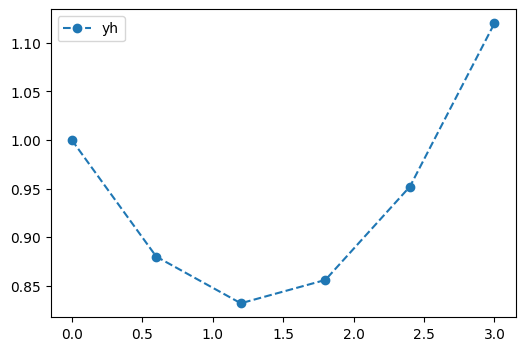

In [2]:
# Solucion de la ecuacion y' = f(x,y); y(0) = 1
y = lambda x: 0.1*(x-1)**2
f = lambda x,y:  0.1*2*(x-1)+0*y

# Iteration
x = np.linspace(0,3,6)
yh = np.zeros(x.size)
yh[0] = 1
for j in range(x.size-1):
    dxj = x[j+1]-x[j]
    yh[j+1] = yh[j] + dxj*f(x[j],yh[j])

fig, ax = plt.subplots(1,1, figsize=(6,4)) 
ax.plot(x,yh,'--o', label='yh')
ax.legend()
plt.show()

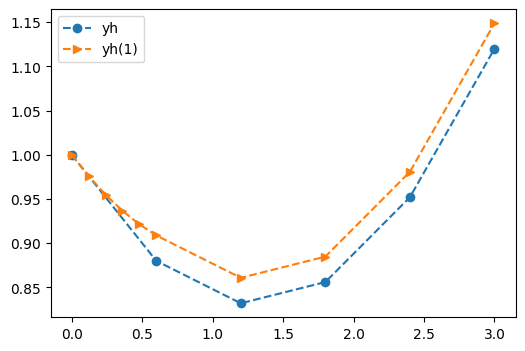

In [3]:
nref=6
x1 = np.concatenate((np.linspace(x[0],x[1], nref),x[2:]))
yh1 = np.zeros(x1.size)
yh1[0] = 1
for j in range(x1.size-1):
    dxj = x1[j+1]-x1[j]
    yh1[j+1] = yh1[j] + dxj*f(x1[j],yh1[j])
fig, ax = plt.subplots(1,1, figsize=(6,4)) 
ax.plot(x,yh,'--o', label='yh')
ax.plot(x1,yh1,'-->',label='yh(1)')
ax.legend()
plt.show()

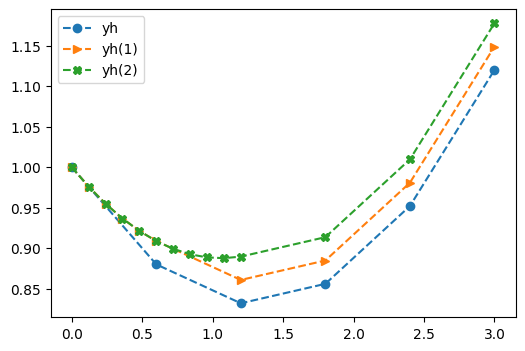

In [4]:
x2 = np.concatenate((x1[0:nref-1], np.linspace(x1[nref-1],x1[nref],nref),x1[nref+1:]))
yh2 = np.zeros(x2.size)
yh2[0] = 1
for j in range(x2.size-1):
    dxj = x2[j+1]-x2[j]
    yh2[j+1] = yh2[j] + dxj*f(x2[j],yh2[j])
fig, ax = plt.subplots(1,1, figsize=(6,4)) 
ax.plot(x,yh,'--o', label='yh')
ax.plot(x1,yh1,'-->',label='yh(1)')
ax.plot(x2,yh2,'--X',label='yh(2)')
ax.legend()
plt.show()

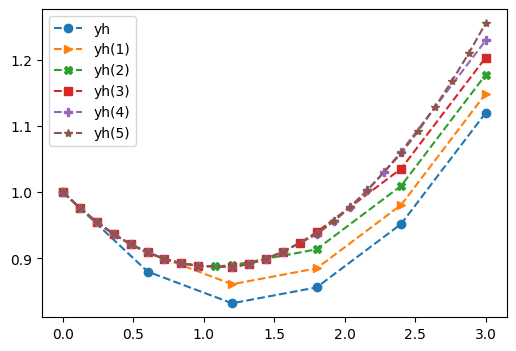

In [5]:
#
x3 = np.concatenate((x2[0:2*(nref-1)-1], np.linspace(x2[2*(nref-1)],x2[2*(nref-1)+1],nref),x2[2*nref:]))
yh3 = np.zeros(x3.size)
yh3[0] = 1
for j in range(x3.size-1):
    dxj = x3[j+1]-x3[j]
    yh3[j+1] = yh3[j] + dxj*f(x3[j],yh3[j])
#
x4 = np.concatenate((x3[0:3*(nref-1)-2], np.linspace(x3[3*(nref-1)-1],x3[3*(nref-1)],nref),x3[3*(nref-1)+1:]))
yh4 = np.zeros(x4.size)
yh4[0] = 1
for j in range(x4.size-1):
    dxj = x4[j+1]-x4[j]
    yh4[j+1] = yh4[j] + dxj*f(x4[j],yh4[j])
#
x5 = np.concatenate((x4[0:4*(nref-1)-3], np.linspace(x4[4*(nref-1)-2],x4[4*(nref-1)-1],nref)))
yh5 = np.zeros(x5.size)
yh5[0] = 1
for j in range(x5.size-1):
    dxj = x5[j+1]-x5[j]
    yh5[j+1] = yh5[j] + dxj*f(x5[j],yh5[j])

    
    
fig, ax = plt.subplots(1,1, figsize=(6,4)) 
ax.plot(x,yh,'--o', label='yh')
ax.plot(x1,yh1,'-->',label='yh(1)')
ax.plot(x2,yh2,'--X',label='yh(2)')
ax.plot(x3,yh3,'--s',label='yh(3)')
ax.plot(x4,yh4,'--P',label='yh(4)')
ax.plot(x5,yh5,'--*',label='yh(5)')
ax.legend()
plt.show()

## Ejemplo: Teorema de existencia de Peano
\begin{equation}
y' = 4\left( \mathrm{sign}(y) + \max (0, x-\frac{|y|}{x})\cos(\frac{\pi \log(x)}{\log(2)})\right)
\end{equation}

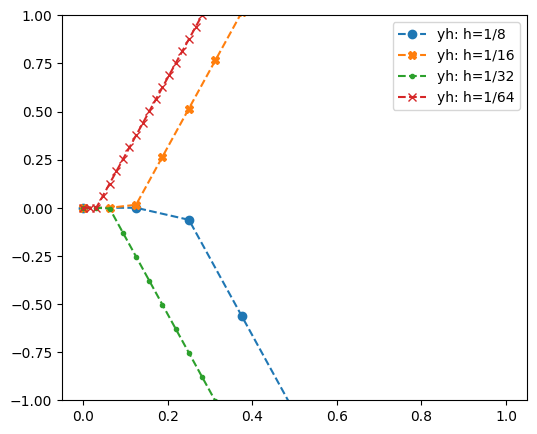

In [6]:
def funPeano(x,y):
    if x>0:
        return 4.0*(np.sign(y) + max(0,x-abs(y)/x)*np.cos(np.pi*np.log10(x)/np.log10(2.0)))
    else:
        return 4*np.sign(y)
i = 3
x3 = np.linspace(0,1, 2**i+1)
yh3 = np.zeros(x3.size)
yh3[0] = 0
for j in range(x3.size-1):
    dxj = x3[j+1]-x3[j]
    yh3[j+1] = yh3[j] + dxj*funPeano(x3[j],yh3[j])
#
i = 4
x4 = np.linspace(0,1, 2**i+1)
yh4 = np.zeros(x4.size)
yh4[0] = 0
for j in range(x4.size-1):
    dxj = x4[j+1]-x4[j]
    yh4[j+1] = yh4[j] + dxj*funPeano(x4[j],yh4[j])
#
i = 5
x5 = np.linspace(0,1, 2**i+1)
yh5 = np.zeros(x5.size)
yh5[0] = 0
for j in range(x5.size-1):
    dxj = x5[j+1]-x5[j]
    yh5[j+1] = yh5[j] + dxj*funPeano(x5[j],yh5[j])
#
i = 6
x6 = np.linspace(0,1, 2**i+1)
yh6 = np.zeros(x6.size)
yh6[0] = 0
for j in range(x6.size-1):
    dxj = x6[j+1]-x6[j]
    yh6[j+1] = yh6[j] + dxj*funPeano(x6[j],yh6[j])
#
fig, ax = plt.subplots(1,1, figsize=(6,5)) 
ax.plot(x3,yh3,'--o', label='yh: h=1/8')
ax.plot(x4,yh4,'--X', label='yh: h=1/16')
ax.plot(x5,yh5,'--.', label='yh: h=1/32')
ax.plot(x6,yh6,'--x', label='yh: h=1/64')
ax.set_ylim([-1,1])
ax.legend()
plt.show()

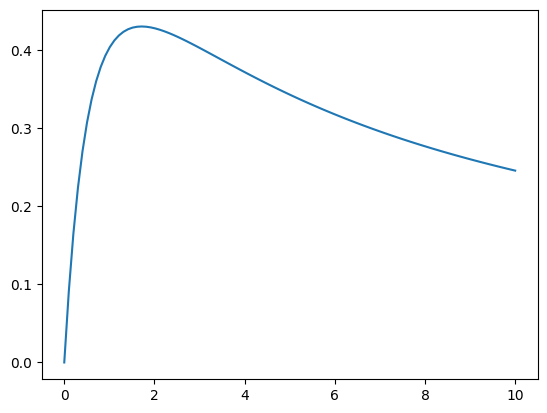

In [7]:
XM = lambda C: 1.0/(2.0*(1+C))*np.log(1+2*C*(1+C))
c=np.linspace(0,10,100)
plt.plot(c, XM(c))
plt.show()

# Metodo de Euler explicito

In [8]:
def Euler_explicito(odefun, t_span, y0, h=None, return_trajectory=False): 
    '''
    Metodo de Euler explicito
    Resuelve: dy/dy = odefun(t,y), y(t0) = y0
    Input  : odefun, t_span = (tiemp inicial, tiempo final)
             y0 condicion inicial, h paso en t, 
             return_trajectory returnar o no toda la trajectoria de la solucion
    Output : (t,y)
    '''
    t0, tf = t_span
    t = t0; y = y0
    if h is None: h = (tf-t0)/100
    yh = []; tn = [] 
    if return_trajectory: yh.append(y0); tn.append(0.0)
    
    while tf-t>1e-14:
        # Paso de Euler explicito
        y = y + h*odefun(t,y)
        t+=h
        if return_trajectory: yh.append(y); tn.append(t)
    if return_trajectory: 
        return (np.array(yh),tn) 
    else: 
        return y,t

## Ejemplo:
\begin{equation}
y' = 2x,\quad y(0) = 0 
\end{equation}

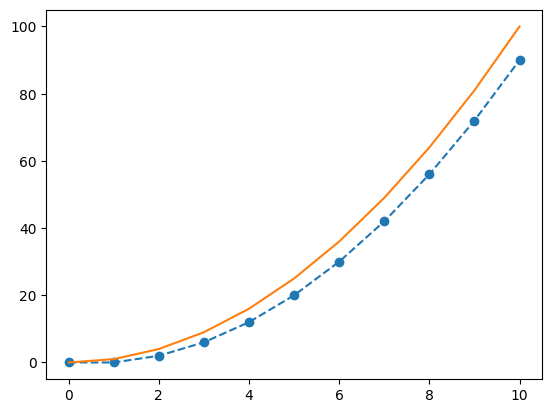

In [9]:
f1 = lambda x,y: 2*x + 0*y
y0 = 0

y10, x10 = Euler_explicito(odefun=f1, t_span=(0.0, 10.0), y0=0, h=1.0, return_trajectory=True)
yexact = lambda x: x**2
plt.plot(x10,y10,'--o')
plt.plot(x10,yexact(np.asarray(x10)))
plt.show()

## Ejemplo:
\begin{equation}
y' = \tan^{-1}(y),\quad y(0) = y_0 
\end{equation}

[1.         1.39269908 1.86673497 2.40623616 2.994699   3.61895641
 4.2695568  4.93992037 5.62545187 6.32288714 7.02985712]


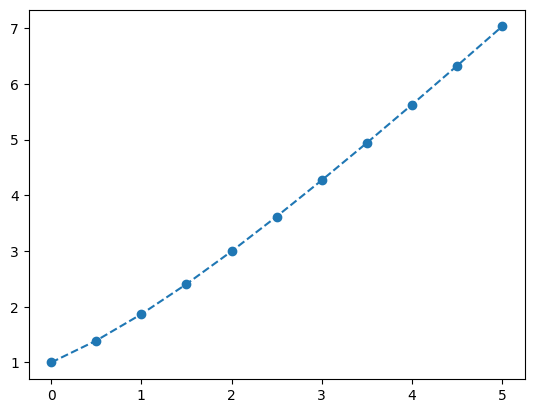

In [10]:
f1 = lambda x, y: np.arctan(y)
y0 = 1

# y10, x10 = Euler_explicito(f1, y0, 10, 5, 0)
y10, x10 = Euler_explicito(odefun=f1, t_span=(0.0, 5.0), y0=y0, h=.5, return_trajectory=True)

#yexact = lambda x: x**2
print(y10)
plt.plot(x10,y10,'--o')
#plt.plot(x10,yexact(np.asarray(x10)))
plt.show()

## Ejemplo 2:
\begin{equation}
y' = y^{2} - \frac{x^{4} - 6x^{3} + 12x^{2} - 14x + 9}{(1+x)^{2}},\quad y(0) = 2 
\end{equation}

[0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2, 1.4, 1.5999999999999999]


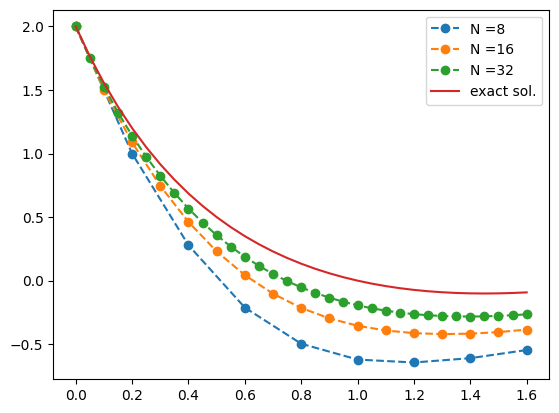

In [11]:
f2 = lambda x, y: y**2-(x**4-6*x**3 + 12*x**2 - 14*x + 9)/(1+x)**2
y0 = 2
yexact = lambda x: (1-x)*(2-x)/(1+x)
XM=1.6
y8, x8 = Euler_explicito(odefun=f2, t_span=(0.0, XM), y0=y0, h=XM/8.0, return_trajectory=True)
y16, x16 = Euler_explicito(odefun=f2, t_span=(0.0, XM), y0=y0, h=XM/16.0, return_trajectory=True)
y32, x32 = Euler_explicito(odefun=f2, t_span=(0.0, XM), y0=y0, h=XM/32.0, return_trajectory=True)

print(x8)
plt.plot(x8,y8, '--o', label='N =8')
plt.plot(x16,y16, '--o', label='N =16')
plt.plot(x32,y32, '--o', label='N =32')
plt.plot(x32, yexact(np.asarray(x32)), label='exact sol.')
plt.legend()
plt.show()

<hr style="border:3px solid #E3AE00 "> </hr>


# Clase 3

In [12]:
from scipy.optimize import newton

In [13]:
def Euler_implicito(odefun, t_span, y0, h=None, return_trajectory=False, odefunprime=None ): 
    '''
    Metodo de Euler implicito
    Resuelve: dy/dy = odefun(t,y), y(t0) = y0
    Input  : odefun, t_span = (tiemp inicial, tiempo final)
             y0 condicion inicial, h paso en t, 
             return_trajectory returnar o no toda la trajectoria de la solucion
    Output : (t,y)
    '''
    t0, tf = t_span
    t = t0; y = y0
    
    if h is None: h = (tf-t0)/100
    if return_trajectory: yh = []; tn = []; yh.append(y0); tn.append(0.0)
    if np.isscalar(y0): I = 1.0 
    else: I = np.eye(y0.size)
    
    F = lambda z,t0,y0: z-h*odefun(t0+h,z) - y0
    if odefunprime is not None: J = lambda z,t0,y0: I - h*odefunprime(t0+h,z)
    else: J = None
        
    while tf-t>1e-14:
        # Paso de Euler implicito
        y = newton(F, y0, fprime=J, args=(t,y))
        t+=h
        if return_trajectory: yh.append(y); tn.append(t)
            
    if return_trajectory: return (np.array(yh),np.array(tn)) 
    else: return y,t

## Ejemplo


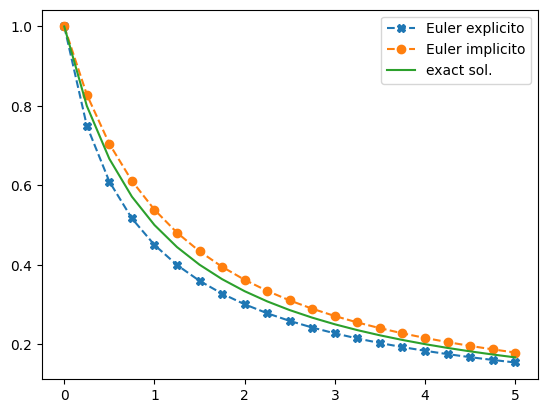

In [14]:
fun = lambda x,y : -y**2
dfundy = lambda x,y: -2*y
yexact = lambda x: 1.0/(1.0+x)

ye,te = Euler_explicito(odefun=fun, t_span=(0.0, 5.0), y0=1.0, h=5.0/20.0, return_trajectory=True)
y,t = Euler_implicito(odefun=fun, t_span=(0.0,5.0), y0=1.0, h=5.0/20.0, return_trajectory=True, odefunprime=dfundy)
#y,t = Euler_implicito(odefun=fun, t_span=(0.0,5.0), y0=1.0, h=5.0/20.0, return_trajectory=True)

plt.plot(te,ye, '--X', label='Euler explicito')
plt.plot(t,y, '--o', label='Euler implicito')
plt.plot(t, yexact(t), label='exact sol.')
plt.legend()
plt.show()

In [15]:
def trapezoidalrule(odefun, t_span, y0, h=None, return_trajectory=False, odefunprime=None ):
    '''
    Metodo de regla del trapecio
    Resuelve: dy/dy = odefun(t,y), y(t0) = y0
    Input  : odefun, t_span = (tiemp inicial, tiempo final)
             y0 condicion inicial, h paso en t, 
             return_trajectory returnar o no toda la trajectoria de la solucion
    Output : (t,y)
    '''
    t0, tf = t_span
    t = t0; y = y0
    if h is None: h = (tf-t0)/100
    if return_trajectory: yh = []; tn = []; yh.append(y0); tn.append(0.0)
    if np.isscalar(y0): I = 1.0 
    else: I = np.eye(y0.size)
    
    F = lambda z,t0,y0: z-0.5*h*(odefun(t0,y0)+odefun(t0+h,z)) - y0
    if odefunprime is not None: J = lambda z,t0,y0: I - 0.5*h*odefunprime(t0+h,z)*odefun(t0+h,z)
    else: J = None
    
    while tf-t>1e-14:
        # Paso de regla del trapecio
        y = newton(F, y0, fprime=J, args=(t,y))
        t+=h
        if return_trajectory: yh.append(y); tn.append(t)
            
    if return_trajectory: return (np.array(yh),np.array(tn)) 
    else: return y,t

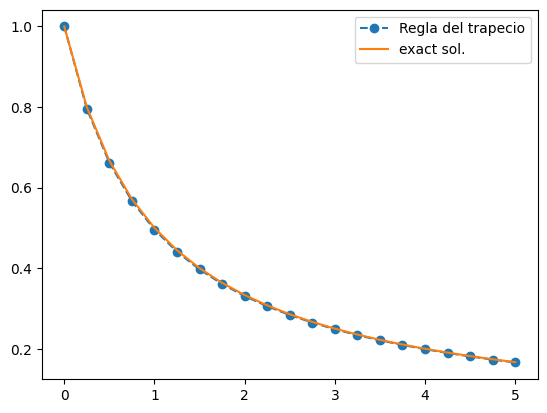

In [16]:
fun = lambda x,y : -y**2
dfundy = lambda x,y: -2*y
yexact = lambda x: 1.0/(1.0+x)

#y,t = Euler_implicito(odefun=fun, t_span=(0.0,5.0), y0=1.0, h=None, return_trajectory=True, odefunprime=dfundy)
y,t = trapezoidalrule(odefun=fun, t_span=(0.0,5.0), y0=1.0, h=5.0/20.0, return_trajectory=True)

plt.plot(t,y, '--o', label='Regla del trapecio')
plt.plot(t, yexact(t), label='exact sol.')
plt.legend()
plt.show()

## Ejemplo: Cuando todo va bien
\begin{alignat}{4}
y' &= - y + 2\exp(-x)\cos(2x) \\
y(0)& = 0 \\
h & = \frac{1}{2}, \frac{1}{10}, \frac{1}{50}.
\end{alignat}

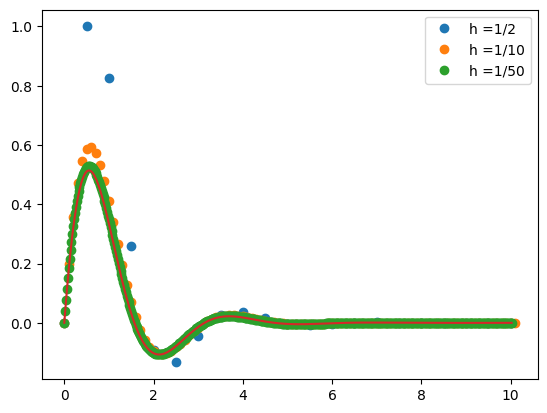

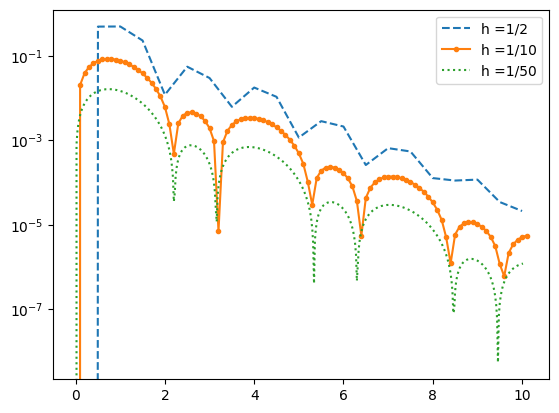

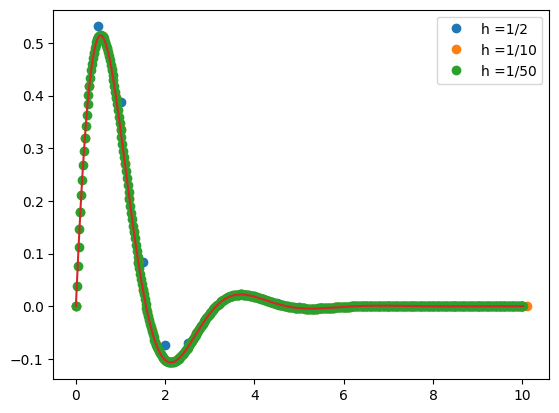

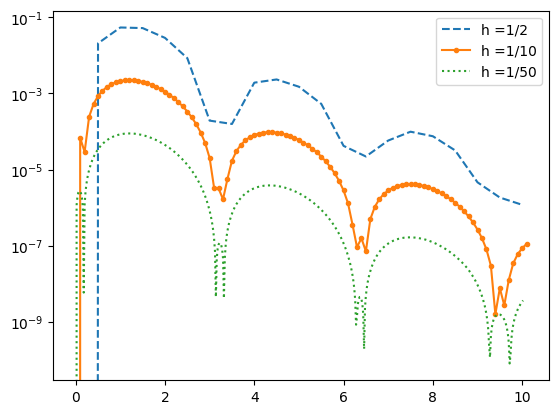

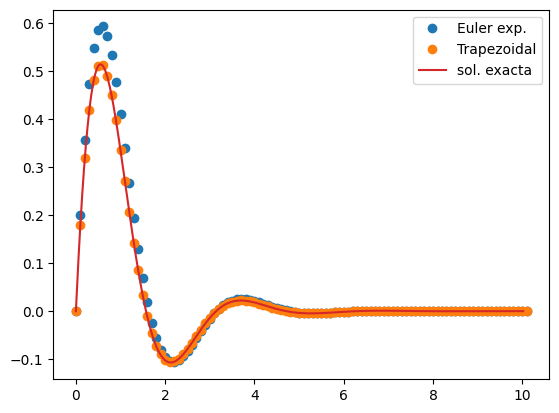

In [49]:
f3 = lambda x, y:-y + 2*np.exp(-x)*np.cos(2*x)
f3prime = lambda x,y: -1 +0*y+0*x # df/dy
y0 = 0
XM = 10
h = np.array([0.5,0.1,0.02])
N = [int(XM/hi) for hi in h]
yexact = lambda x: np.exp(-x)*np.sin(2*x)

# Euler
y1, x1 = Euler_explicito(odefun=f3, t_span=(0.0, XM), y0=0, h=h[0], return_trajectory=True)
y2, x2 = Euler_explicito(odefun=f3, t_span=(0.0, XM), y0=0, h=h[1], return_trajectory=True)
y3, x3 = Euler_explicito(odefun=f3, t_span=(0.0, XM), y0=0, h=h[2], return_trajectory=True)

# Trapezoidal
Th1,xh1 = trapezoidalrule(odefun=f3, t_span=(0.0,10), y0=0, h=h[0], return_trajectory=True, odefunprime=f3prime)
Th2,xh2 = trapezoidalrule(odefun=f3, t_span=(0.0,10), y0=0, h=h[1], return_trajectory=True, odefunprime=f3prime )
Th3,xh3 = trapezoidalrule(odefun=f3, t_span=(0.0,10), y0=0, h=h[2], return_trajectory=True,odefunprime=f3prime )

# plots Euler
plt.plot(x1,y1, 'o', label='h =1/2')
plt.plot(x2,y2, 'o', label='h =1/10')
plt.plot(x3,y3, 'o', label='h =1/50')
plt.plot(x3, yexact(np.asarray(x3)))
plt.legend()
plt.show()

fig, ax = plt.subplots(1)
eh1 = np.abs(yexact(np.asarray(x1))-y1)
eh2 = np.abs(yexact(np.asarray(x2))-y2)
eh3 = np.abs(yexact(np.asarray(x3))-y3)
ax.semilogy(x1,eh1, '--', label='h =1/2')
ax.semilogy(x2,eh2, '.-', label='h =1/10')
ax.semilogy(x3,eh3, ':', label='h =1/50')
ax.legend()
plt.show()

# plots trapezoidal
plt.plot(xh1,Th1, 'o', label='h =1/2')
plt.plot(xh2,Th2, 'o', label='h =1/10')
plt.plot(xh3,Th3, 'o', label='h =1/50')
plt.plot(xh3, yexact(np.asarray(xh3)))
plt.legend()
plt.show()

fig, ax = plt.subplots(1)
eh1T = np.abs(yexact(np.asarray(xh1))-Th1)
eh2T = np.abs(yexact(np.asarray(xh2))-Th2)
eh3T = np.abs(yexact(np.asarray(xh3))-Th3)
ax.semilogy(xh1,eh1T, '--', label='h =1/2')
ax.semilogy(xh2,eh2T, '.-', label='h =1/10')
ax.semilogy(xh3,eh3T, ':', label='h =1/50')
ax.legend()
plt.show()


fig, ax = plt.subplots(1)
plt.plot(x2,y2, 'o', label='Euler exp.')
plt.plot(xh2,Th2, 'o', label='Trapezoidal')
plt.plot(x3, yexact(np.asarray(x3)), 'C03', label='sol. exacta')
plt.legend()
plt.savefig('figclase3.png')
plt.show()


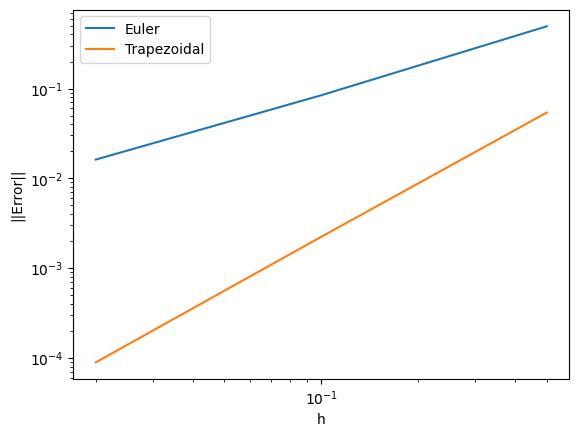

In [51]:
def eoc(h,error): # estimated rates of convergence
    r = [0.0]
    for j in range(1, h.size):
        r.append(np.log(error[j]/error[j-1])/np.log(h[j]/h[j-1]))
    return np.asarray(r)

maxErrorEuler = [ np.max(err) for err in [eh1, eh2, eh3]]
maxErrorTrap  = [ np.max(err) for err in [eh1T, eh2T, eh3T]]
              
dictex1 = {"h": h , "Error Euler":maxErrorEuler, "eoc Euler": eoc(h, maxErrorEuler), "Error Trap":maxErrorTrap,"eoc Trap.":eoc(h, maxErrorTrap)}
dfex1 = pd.DataFrame(dictex1)
dfex1

# # Graficos de error

plt.loglog(h, maxErrorEuler,label='Euler')
plt.loglog(h, maxErrorTrap,label='Trapezoidal')
plt.legend()
plt.xlabel('h')
plt.ylabel('||Error||')
plt.show()

Con la solucion exacta podemos calcular una aproximacion de los ordenes de convergencia de forma experimental. Esto lo hacemos de la siguiente forma
$$
r_{h'} = \log(e_{h'}/e_{h})/\log(h'/h)
$$
En este caso el error parece oscilar en tiempo, lo que puede explicarse por la componente periodica de la solucion exacta. Ademas se observa para ambos metodos que el error parece decaer en tiempo. Podriamos pensar que el error tenderia a acumularse de un paso al siguiente, sin embargo, como se ve en este ejemplo, esto no es necesariamente correcto.

## Ejemplo: Cuando falla
\begin{alignat}{4}
y' &= \log(3)(y - [y]-3/2) \\
y(0)& = 0 \\
h & = \frac{1}{100}, \frac{1}{1000}.
\end{alignat}

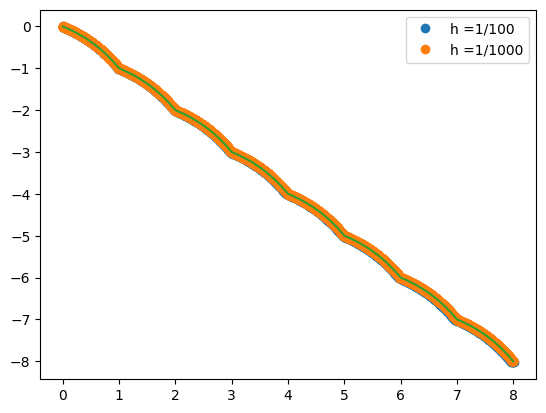

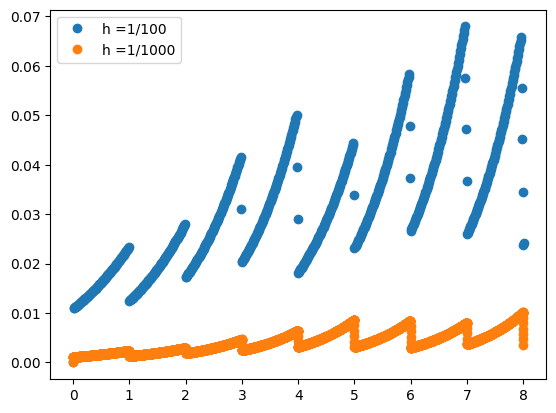

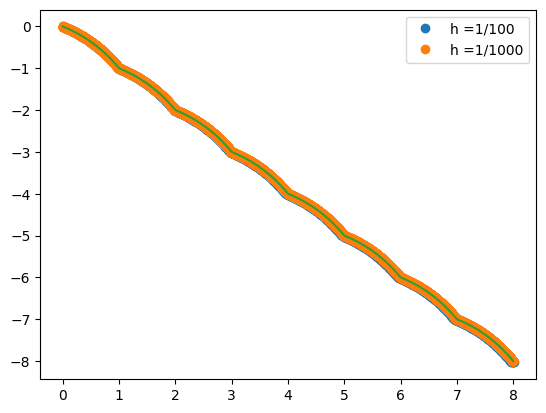

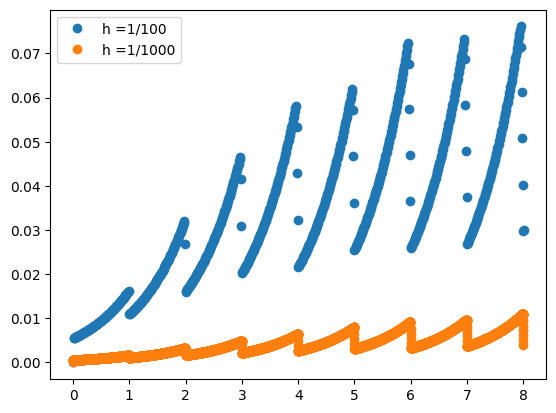

In [44]:
f4 = lambda x, y: np.log(3)*(y-np.floor(y)-1.5 )

y0 = 0
XM = 8
h = np.array([0.01,0.001])
N = [int(XM/hi) for hi in h]

yexact = lambda x: -np.floor(x) + 0.5*(1-3**(x-np.floor(x)))
# Euler
yh1, xh1 = Euler_explicito(odefun=f4, t_span=(0.0, XM), y0=y0, h=h[0], return_trajectory=True)
yh2, xh2 = Euler_explicito(odefun=f4, t_span=(0.0, XM), y0=y0, h=h[1], return_trajectory=True)

plt.plot(xh1,yh1, 'o', label='h =1/100')
plt.plot(xh2,yh2, 'o', label='h =1/1000')
plt.plot(xh2, yexact(np.asarray(xh2)))
plt.legend()
plt.show()

fig, ax = plt.subplots(1)
eh1 = np.abs(yexact(np.asarray(xh1))-yh1)
eh2 = np.abs(yexact(np.asarray(xh2))-yh2)
ax.plot(xh1,eh1, 'o', label='h =1/100')
ax.plot(xh2,eh2, 'o', label='h =1/1000')
ax.legend()
plt.show()

# Trapezoidal
Th1, xh1 = trapezoidalrule(odefun=f4, t_span=(0.0,XM), y0=0, h=h[0], return_trajectory=True, odefunprime=f3 )
Th2, xh2 = trapezoidalrule(odefun=f4, t_span=(0.0,XM), y0=0, h=h[1], return_trajectory=True, odefunprime=f3 )


plt.plot(xh1,Th1, 'o', label='h =1/100')
plt.plot(xh2,Th2, 'o', label='h =1/1000')
plt.plot(xh2, yexact(np.asarray(xh2)))
plt.legend()
plt.show()

fig, ax = plt.subplots(1)
eh1T = np.abs(yexact(np.asarray(xh1))-Th1)
eh2T = np.abs(yexact(np.asarray(xh2))-Th2)
ax.plot(xh1,eh1T, 'o', label='h =1/100')
ax.plot(xh2,eh2T, 'o', label='h =1/1000')
ax.legend()
plt.show()

In [46]:
maxErrorEuler = [ np.max(err) for err in [eh1, eh2]]
maxErrorTrap  = [ np.max(err) for err in [eh1T, eh2T]]
              
dictex2 = {"h": h , "Error Euler":maxErrorEuler, "eoc Euler": eoc(h, maxErrorEuler), "Error Trap":maxErrorTrap,"eoc Trap.":eoc(h, maxErrorTrap)}
dfex2 = pd.DataFrame(dictex2)
dfex2

,h,Error Euler,eoc Euler,Error Trap,eoc Trap.
0,0.010,0.067978,0.000000,0.076092,0.00000
1,0.001,0.010133,0.826628,0.011080,0.83679


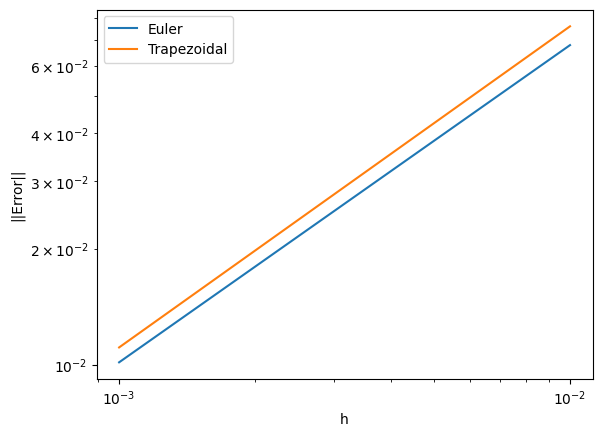

In [47]:
# Graficos de error
plt.loglog(h, maxErrorEuler,label='Euler')
plt.loglog(h, maxErrorTrap,label='Trapezoidal')
plt.legend()
plt.xlabel('h')
plt.ylabel('||Error||')
plt.show()

Los Teoremas vistos en clases asumen que $f$ satisface la condicion de Lipschitz. Por esta razon, esperariamos con los metodos numericos, aun aplicables a casos sin esta condicion, no nos entreguen el rendimiento esperado. En este ejemplo la funcion $f$ no satisface esta condicion (demuestrelo).

Se observa experimentalmente que el error decrece con $h$, a razon $\mathcal O(h)$ para ambos m\'etodos. En particular para la regla trapezoidal esto no es lo que se espera en el caso Lipschitz.

## Clase 4

### Ejemplo: Convergencia
\begin{equation}
y' = -y^{2},\qquad y(0) = 1
\end{equation}

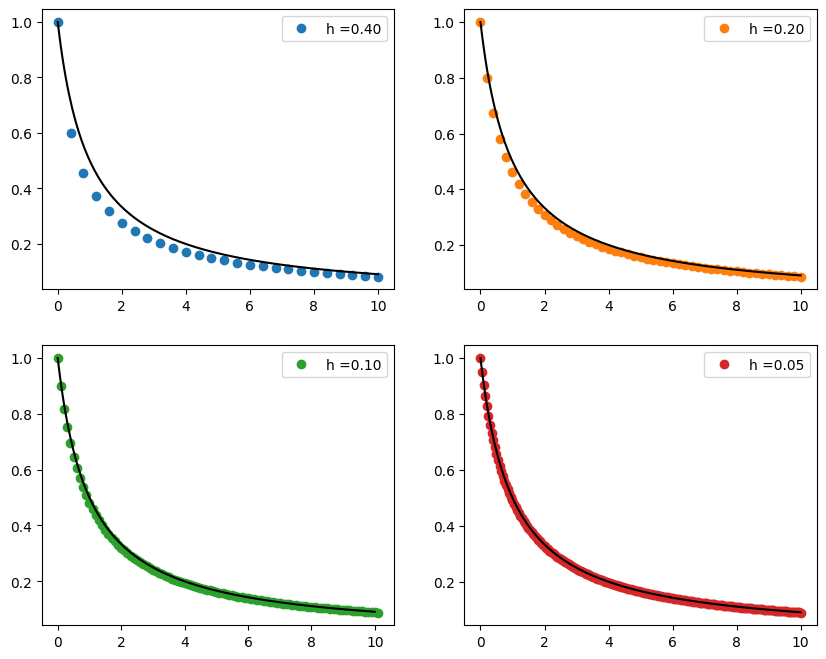

In [2]:
from Capitulo1_metodos import Euler_explicito, trapezoidalrule
fun = lambda x,y : -y**2
dfundy = lambda x,y: -2*y
y0 = 1
XM = 10
h = [0.4, 0.2, 0.1, 0.05, 0.025, 0.0125]
N = [int(XM/hi) for hi in h]

yexact = lambda x: 1.0/(1.0+x)
YH = []
XH = []
# Euler
for i,hi in enumerate(h):
#     yh, xh = Euler_explicito(fun, y0, N=N[i], XM = XM, x0 =0)
#     Euler_explicito(odefun=fun, t_span=, y0, h=None, return_trajectory=False)
    yh, xh = Euler_explicito(odefun=fun, t_span=(0.0, XM), y0=y0, h=h[i], return_trajectory=True)
    YH.append(yh)
    XH.append(xh)

fig, ax = plt.subplots(2,2, figsize=(10,8))
ax[0,0].plot(XH[0],YH[0], 'o', color='C00',label='h =%.2f'%h[0])
ax[0,0].plot(XH[3], yexact(np.asarray(XH[3])),'k')
ax[0,0].legend()
ax[0,1].plot(XH[1],YH[1], 'o', color='C01',label='h =%.2f'%h[1])
ax[0,1].plot(XH[3], yexact(np.asarray(XH[3])),'k')
ax[0,1].legend()
ax[1,0].plot(XH[2],YH[2], 'o', color='C02',label='h =%.2f'%h[2])
ax[1,0].plot(XH[3], yexact(np.asarray(XH[3])),'k')
ax[1,0].legend()
ax[1,1].plot(XH[3],YH[3], 'o', color='C03',label='h =%.2f'%h[3])
ax[1,1].plot(XH[3], yexact(np.asarray(XH[3])),'k')
ax[1,1].legend()
plt.show()

## Compute error 
EH = []
EOC = ['-']
for i,hi in enumerate(h):
    eh = np.max(np.abs(yexact(np.asarray(XH[i]))-YH[i]))
    EH.append(eh)
    if i>0:
        EOC.append(np.log(EH[i]/EH[i-1])/np.log(h[i]/h[i-1]))
        
        
# Trapezoidal rule
TH = []
XH = []
for i,hi in enumerate(h):
#     th, xh = trapezoidalrule(fun, y0, N=N[i], XM = XM, x0 =0, dfdy=dfundy)
    th,xh = trapezoidalrule(odefun=fun, t_span=(0.0,XM), y0=y0, h=hi, return_trajectory=True, odefunprime=dfundy)
    TH.append(th)
    XH.append(xh)
## Compute error 
EHT = []
EOCT = ['-']
for i,hi in enumerate(h):
    eh = np.max(np.abs(yexact(np.asarray(XH[i]))-TH[i]))
    EHT.append(eh)
    if i>0:
        EOCT.append(np.log(EHT[i]/EHT[i-1])/np.log(h[i]/h[i-1]))

In [3]:
df = pd.DataFrame({'h':h, 'Euler error':EH, 'Euler eoc':EOC,  'Trap. error':EHT, 'Trap. eoc':EOCT})
df

,h,Euler error,Euler eoc,Trap. error,Trap. eoc
0,0.4000,0.114286,-,0.012724,-
1,0.2000,0.043317,1.399647,0.002979,2.094603
2,0.1000,0.019836,1.126826,0.000744,2.001097
3,0.0500,0.009532,1.057308,0.000185,2.005023
4,0.0250,0.004680,1.026125,0.000046,2.001253
5,0.0125,0.002319,1.012787,0.000012,2.000313


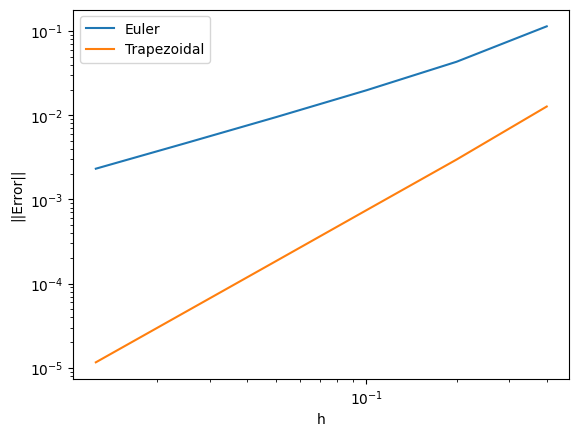

In [4]:
# Graficos de error
plt.loglog(h, EH,label='Euler')
plt.loglog(h, EHT,label='Trapezoidal')
plt.legend()
plt.xlabel('h')
plt.ylabel('||Error||')
plt.show()

## Metodos de paso multiple

In [3]:
from Capitulo1_metodos import simpsonmult

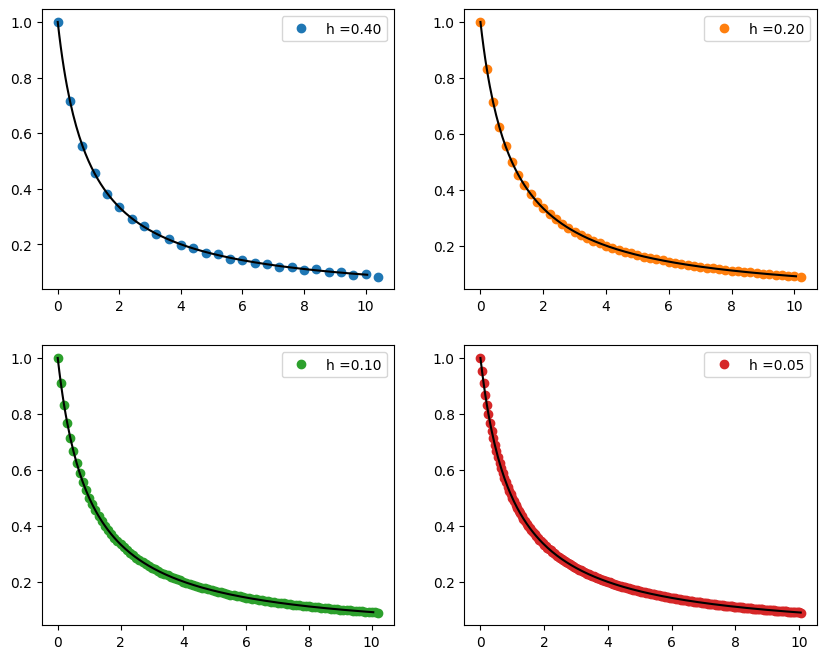

,h,Simpson error,Simpson eoc
0,0.4000,3.675697e-03,-
1,0.2000,2.466939e-04,3.897224
2,0.1000,1.171779e-05,4.39595
3,0.0500,5.108886e-07,4.519548
4,0.0250,3.029583e-08,4.075818
5,0.0125,1.833675e-09,4.046309


In [4]:
fun = lambda x,y : -y**2
dfundy = lambda x,y: -2*y
y0 = 1.0
XM = 10
h = [0.4, 0.2, 0.1, 0.05, 0.025, 0.0125]
N = [int(XM/hi) for hi in h]

yexact = lambda x: 1.0/(1.0+x)

YH = []
XH = []
# Simpson rule paso multiple

for i,hi in enumerate(h):
    y1 = 1.0/(1.0+hi)
    yh, xh = simpsonmult(fun, t_span=(0,XM), y0=y0, h =hi, y1=y1, return_trajectory=True, odefunprime=dfundy)
    YH.append(yh)
    XH.append(xh)
# print(YH, XH)
## Compute error 
EH = []
EOC = ['-']
for i,hi in enumerate(h):
    eh = np.max(np.abs(yexact(np.asarray(XH[i]))-YH[i]))
    EH.append(eh)
    if i>0:
        EOC.append(np.log(EH[i]/EH[i-1])/np.log(h[i]/h[i-1]))
        
fig, ax = plt.subplots(2,2, figsize=(10,8))
ax[0,0].plot(XH[0],YH[0], 'o', color='C00',label='h =%.2f'%h[0])
ax[0,0].plot(XH[3], yexact(np.asarray(XH[3])),'k')
ax[0,0].legend()
ax[0,1].plot(XH[1],YH[1], 'o', color='C01',label='h =%.2f'%h[1])
ax[0,1].plot(XH[3], yexact(np.asarray(XH[3])),'k')
ax[0,1].legend()
ax[1,0].plot(XH[2],YH[2], 'o', color='C02',label='h =%.2f'%h[2])
ax[1,0].plot(XH[3], yexact(np.asarray(XH[3])),'k')
ax[1,0].legend()
ax[1,1].plot(XH[3],YH[3], 'o', color='C03',label='h =%.2f'%h[3])
ax[1,1].plot(XH[3], yexact(np.asarray(XH[3])),'k')
ax[1,1].legend()
plt.show()


df = pd.DataFrame({'h':h, 'Simpson error':EH, 'Simpson eoc':EOC})
df

## Cero-Estable ( o no estables)

### Ejemplo:
\begin{equation}
y_{n+3} + y_{n+2} - y_{n+1} - y_{n} = 2h(f_{n+2}+f_{n+1})
\end{equation}

In [5]:
def methodmulti8(f, y0, y1, y2, N, XM, x0=0):
    h = (XM- x0)/N
    x = []
    x.append(x0); x.append(x0+h); x.append(x0+2*h)
    y = []
    y.append(y0); y.append(y1); y.append(y2)

    xn   = x0; xnp1 = x0+h; xnp2 = x0 +2*h
    yn   = y0; ynp1 = y1; ynp2 = y2
    for n in range(2,N+1):
        xnp3 = xn+3*h
        ynp3 = -ynp2 + ynp1 + yn + 2*h*(f(xn+2*h,ynp2)+f(xn+h, ynp1))
        x.append(xnp3)
        y.append(ynp3)
        yn   = ynp1; xn   = xnp1; 
        ynp1 = ynp2; xnp1 = xnp2;
        ynp2 = ynp3; xnp2 = xnp3;
    return y, x

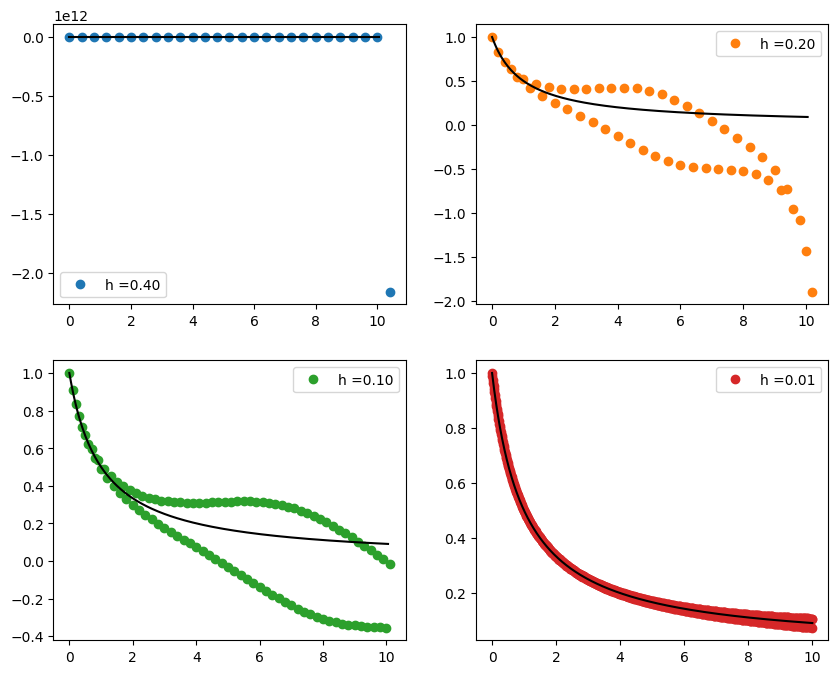

,h,MM8 error,Simpson eoc
0,0.4000,2.156879e+12,-
1,0.2000,1.984081e+00,39.983611
2,0.1000,4.458069e-01,2.15398
3,0.0500,2.306141e-01,0.950938
4,0.0250,6.493557e-02,1.8284
5,0.0125,1.650251e-02,1.976323


In [6]:
YH = []
XH = []
y0 = 1
XM = 10
h = [0.4, 0.2, 0.1, 0.05, 0.025, 0.0125]
N = [int(XM/hi) for hi in h]
for i,hi in enumerate(h):
    y1 = yexact(hi)
    y2 = yexact(2*hi)
    yh, xh = methodmulti8(fun, y0,y1,y2, N=N[i], XM = XM, x0 =0)
    YH.append(yh)
    XH.append(xh)

## Compute error 
EH = []
EOC = ['-']
for i,hi in enumerate(h):
    eh = np.max(np.abs(yexact(np.asarray(XH[i]))-YH[i]))
    EH.append(eh)
    if i>0:
        EOC.append(np.log(EH[i]/EH[i-1])/np.log(h[i]/h[i-1]))
        
fig, ax = plt.subplots(2,2, figsize=(10,8))
ax[0,0].plot(XH[0],YH[0], 'o', color='C00',label='h =%.2f'%h[0])
ax[0,0].plot(XH[3], yexact(np.asarray(XH[3])),'k')
ax[0,0].legend()
ax[0,1].plot(XH[1],YH[1], 'o', color='C01',label='h =%.2f'%h[1])
ax[0,1].plot(XH[3], yexact(np.asarray(XH[3])),'k')
ax[0,1].legend()
ax[1,0].plot(XH[2],YH[2], 'o', color='C02',label='h =%.2f'%h[2])
ax[1,0].plot(XH[3], yexact(np.asarray(XH[3])),'k')
ax[1,0].legend()
ax[1,1].plot(XH[5],YH[5], 'o', color='C03',label='h =%.2f'%h[5])
ax[1,1].plot(XH[5], yexact(np.asarray(XH[5])),'k')
ax[1,1].legend()
plt.show()


df = pd.DataFrame({'h':h, 'MM8 error':EH, 'Simpson eoc':EOC})
df

## El metodo explicito mas preciso de 2 pasos

$$
\alpha_{2}y_{n+2} + \alpha_{1} y_{n+1} + \alpha_{0} y_{n} = h(\beta_{1}f_{n+1} + \beta_{0}f_{n})
$$

In [7]:
A = np.array([[1,1,0,0],[0,1,-1,-1],[0,0.5,0,-1],[0,1.0/6.0,0,-0.5]])
b = np.array([-1,-2,-2,-4.0/3.0])
coefficients = np.linalg.solve(A,b)
alpha2 = 1.0
alpha0 = -5.0
alpha1 = 4.0
beta0 = 2.0
beta1 = 4.0
print(coefficients)

[-5.  4.  2.  4.]


In [8]:
def best2stepsmethod(f, y0, y1, N, XM, x0=0 ):
    # Metodo de 2 pasos explicito de orden mas alto
    h = (XM-x0)/N
    yn = y0
    x = []
    x.append(x0); x.append(x0+h)
    y = []
    y.append(y0); y.append(y1)

    xn   = 0; xnp1 = 0 +h
    yn   = y0; ynp1 = y1
    for n in range(2,N+1):
        xnp2 = xn+2*h
        ynp2 = -alpha1*ynp1 - alpha0*yn + h*(beta1*f(xn+h,ynp1)+beta0*f(xn, yn))
        # ynp2 = -4*ynp1 + 5*yn + h*(4*f(xn+h,ynp1)+2*f(xn, yn))
        if np.abs(ynp2)>10**4:
            return y, x
        x.append(xnp2)
        y.append(ynp2)
        
        yn   = ynp1; xn   = xnp1; 
        ynp1 = ynp2; xnp1 = xnp2;
    return y, x

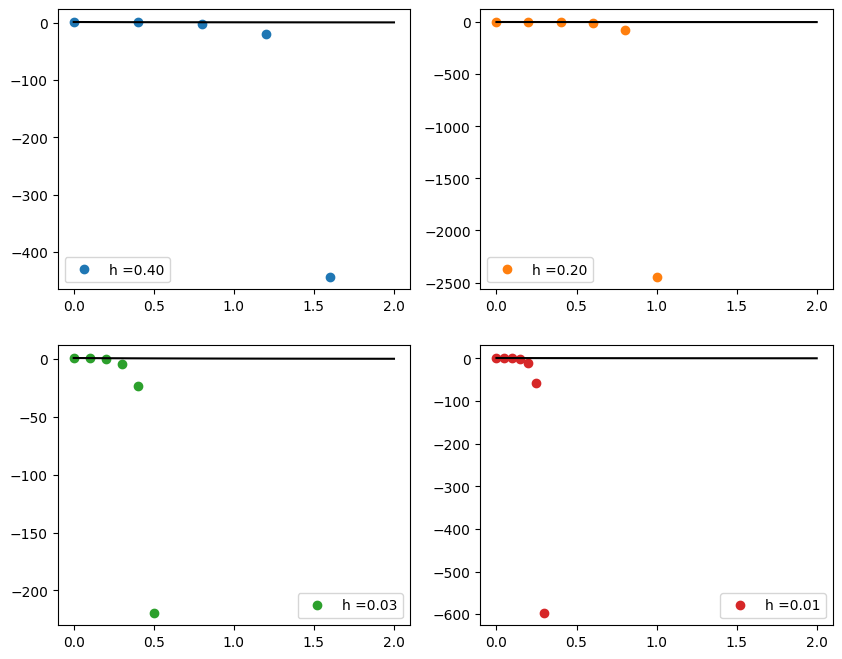

In [11]:
YH = []
XH = []
# Metodo de 2 pasos explicito de orden mas alto
h = [0.4, 0.2, 0.1, 0.05, 0.025, 0.0125]
XM = 2.0
xplot = np.linspace(0,XM,100)
N = [int(XM/hi) for hi in h]
for i,hi in enumerate(h):
    y1 = yexact(hi)
    y2 = yexact(2*hi)
    yh, xh = best2stepsmethod(fun, y0, y1, N=N[i], XM = XM, x0 =0)
    YH.append(yh)
    XH.append(xh)

## Compute error 
EH = []
EOC = ['-']
for i,hi in enumerate(h):
    eh = np.max(np.abs(yexact(np.asarray(XH[i]))-YH[i]))
    EH.append(eh)
    if i>0:
        EOC.append(np.log(EH[i]/EH[i-1])/np.log(h[i]/h[i-1]))
        
fig, ax = plt.subplots(2,2, figsize=(10,8))
ax[0,0].plot(XH[0],YH[0], 'o', color='C00',label='h =%.2f'%h[0])
ax[0,0].plot(xplot, yexact(xplot),'k')
ax[0,0].legend()
ax[0,1].plot(XH[1],YH[1], 'o', color='C01',label='h =%.2f'%h[1])
ax[0,1].plot(xplot, yexact(xplot),'k')
ax[0,1].legend()
ax[1,0].plot(XH[2],YH[2], 'o', color='C02',label='h =%.2f'%h[4])
ax[1,0].plot(xplot, yexact(xplot),'k')
ax[1,0].legend()
ax[1,1].plot(XH[3],YH[3], 'o', color='C03',label='h =%.2f'%h[5])
ax[1,1].plot(xplot, yexact(xplot),'k')
ax[1,1].legend()
plt.show()


## Sistemas de ecuaciones

Capitulo 10. Sistemas de ecuaciones. Exploring ODEs.

1. Considere el sistema de dos variables aut\'onomo

\begin{align*}
\dot{u} & = -v - u(u^{2} + v^{2}) \\
\dot{v} & = u - v(u^{2}+v^{2})
\end{align*}

para $t\in[0,30]$ y con condiciones iniciales $u(0) = 1$ y $v(0) = 0$.

In [15]:
def funsystem1(t,y):
    u,v = y
    F= [-v-u*(u**2+v**2), u - v*(u**2+v**2)]
    return np.asarray(F)

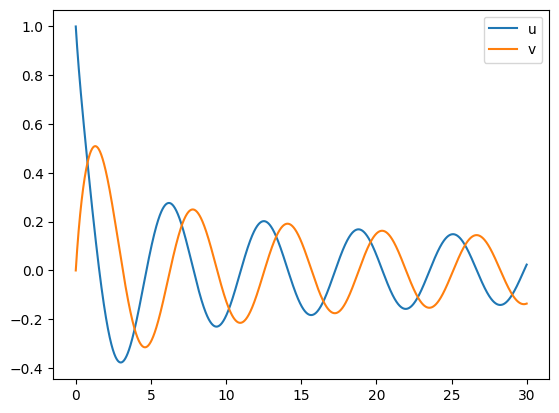

In [50]:
from Capitulo1_metodos import Euler_explicito
u0 = 1.0; v0 = 0.0
y0 = (u0,v0)
# Euler
y1, x1 = Euler_explicito(odefun=funsystem1, t_span=(0.0, 30), y0=y0, h=0.01, return_trajectory=True)
# plots Euler
plt.plot(x1,y1[:,0], '-', label='u')
plt.plot(x1,y1[:,1], '-', label='v')
plt.legend()
plt.show()

**El espacio de fase:**  

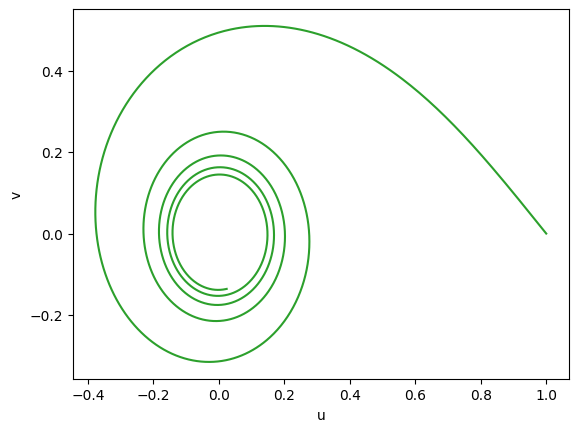

In [52]:
plt.plot(y1[:,0],y1[:,1], '-', color='C02')
plt.xlabel('u')
plt.ylabel('v')
plt.show()

2. **Ecuaciones de Lotka-Volterra**
   
Considere el sistema de dos varaibles conocido como las ecuaciones de depredador-presa o de Lotka-Volterra. Suponemos un ambiente cen el cual hay una especie de presa (conejos), cuya poblacion es una funcion del tiempo $u(t)$ y un especie depredadora (zorros), cuya poblacion es una funcion del tiempo $v(t)$. En la ausencia de zorros, la poblacion de conejos crece exponencialmente gracias a la abundancia de vegetacion, pero esta decrece por encuentros fatales con zorros a una razon proporcional al producto $uv$,

$$
\dot{u} = u - uv.
$$
La poblacion de zorros, por otro lado, decae exponencialmente en la ausencia de conejos pero se expande cuando estos estan disponibles,

$$
\dot{v} = -\frac{1}{5}v + uv 
$$

In [34]:
def funsystem2(t,y):
    u,v = y
    F= [u-u*v,  -0.2*v+ v*u]
    return np.asarray(F)

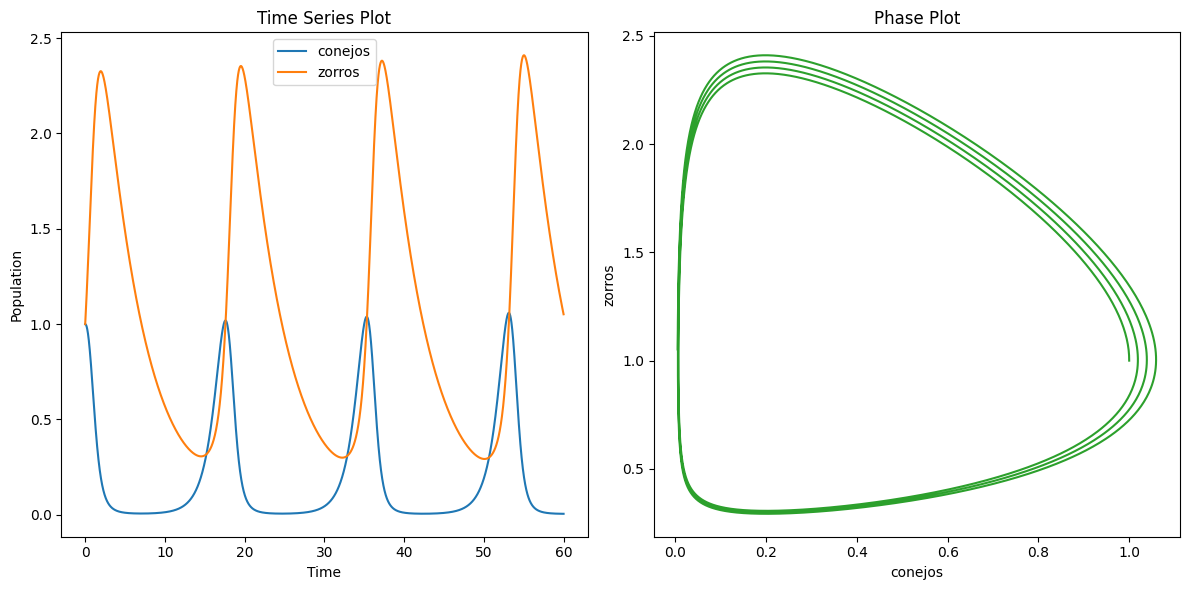

In [49]:
from Capitulo1_metodos import Euler_explicito
u0 = 1.0; v0 = 1.0
y0 = (u0,v0)
# Euler
y2, x2 = Euler_explicito(odefun=funsystem2, t_span=(0.0, 60), y0=y0, h=0.01, return_trajectory=True)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First subplot (time series)
axs[0].plot(x2, y2[:,0], '-', label='conejos')
axs[0].plot(x2, y2[:,1], '-', label='zorros')
axs[0].legend()
axs[0].set_title('Time Series Plot')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Population')

# Second subplot (phase plot)
axs[1].plot(y2[:,0], y2[:,1], '-', color='C02')
axs[1].set_title('Phase Plot')
axs[1].set_xlabel('conejos')
axs[1].set_ylabel('zorros')

# Show the combined figure
plt.tight_layout()
plt.show()

3. **Ecuaciones de Lorenz**

Las ecuaciones de Lorenz son el arquetipo de un sistema **caotico**. Estas consisten en
\begin{align*}
\dot{u} &= c_1(v-u) \\
\dot{v} & = u(c_2-w) - v \\
\dot{w} & = uv - c_3 w
\end{align*}
con $c_1 =10$, $c_2 = 28$ y $c_3=8/3$, coeficientes arbitrarios (no es necesario usar los mismo valores)

In [42]:
def funsystem3(t,y):
    u,v,w = y
    c1 = 10.0
    c2 = 28.0
    c3 = 8.0/3.0
    F= [c1*(v-u), u*(c2-w)-v, u*v - c3*w]
    return np.asarray(F)

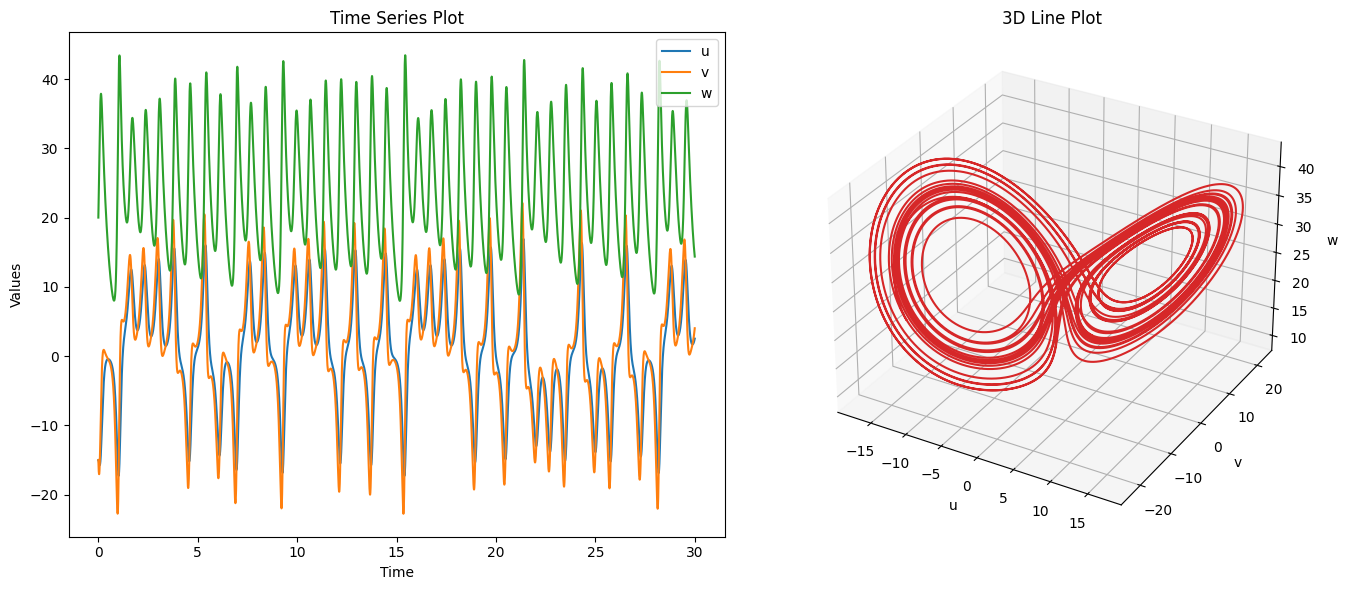

In [54]:
from Capitulo1_metodos import Euler_explicito
u0 = -15.0; v0 = -15.0; w0 = 20 
y0 = (u0,v0,w0)
# Euler
y3, x3 = Euler_explicito(odefun=funsystem3, t_span=(0.0, 30), y0=y0, h=0.001, return_trajectory=True)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming x3, y3, and y2 are already defined

# Create a figure with 2 subplots: 1 for the time series and 1 for the 3D plot
fig = plt.figure(figsize=(14, 6))

# First subplot (time series)
ax1 = fig.add_subplot(121)  # 1 row, 2 columns, 1st subplot
ax1.plot(x3, y3[:,0], '-', label='u')
ax1.plot(x3, y3[:,1], '-', label='v')
ax1.plot(x3, y3[:,2], '-', label='w')
ax1.set_title('Time Series Plot')
ax1.set_xlabel('Time')
ax1.set_ylabel('Values')
ax1.legend()

# Second subplot (phase plot)
ax2 = fig.add_subplot(122, projection='3d')  # 1 row, 2 columns, 2nd subplot

# Plot the 3D line
ax2.plot(y3[:,0], y3[:,1], y3[:,2], color='C03')

# Set labels
ax2.set_xlabel('u')
ax2.set_ylabel('v')
ax2.set_zlabel('w')

# Set a title
ax2.set_title('3D Line Plot')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the combined figure
plt.show()


4. **Ejemplo no caotico en tres dimensiones**.

Analizado en Bender and Orzag, Advanced Mathematical Methods for Scientist and Engineers, paginas 202-204.

\begin{align*}
\dot{u} & = vw \\
\dot{v} & = -2uw \\
\dot{w} & = uv
\end{align*}

Se puede demostrar que cualquier trayectoria $(u(t),v(t), w(t))$ esta sobre una esfera, es decir que satisfaces que la cantidad $u(t)^{2} + v(t)^{2}+w(t)^{2}$ es constante. 

In [71]:
def funsystem4(t,y):
    u,v,w = y
    F= [v*w, -2.0*u*w, u*v]
    return np.asarray(F)

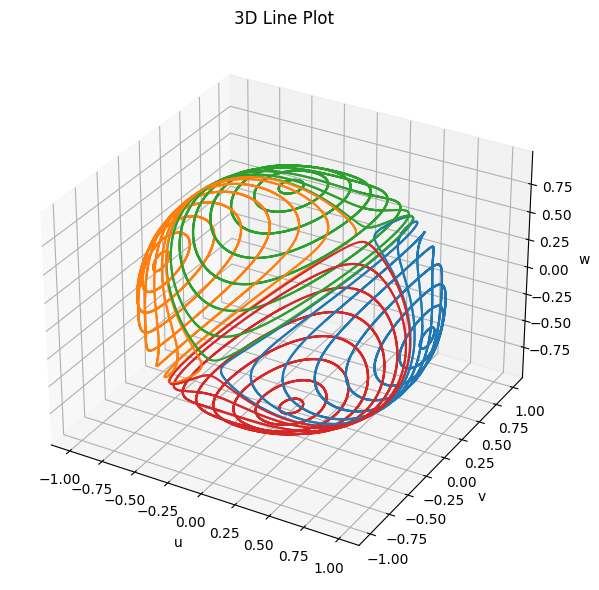

In [75]:
from Capitulo1_metodos import Euler_explicito

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(14, 6))
ax2 = fig.add_subplot(111, projection='3d') 
for theta in np.arange(-1.5,1.7,0.2):
    u0 = np.cos(theta); v0 = np.sin(theta); w0 = 0
    y0 = (u0,v0,w0)
    # Euler
    y4, x4 = Euler_explicito(odefun=funsystem4, t_span=(0.0, 10), y0=y0, h=0.001, return_trajectory=True)

    ax2.plot(y4[:,0], y4[:,1], y4[:,2], color='C00')
    ax2.plot(-y4[:,0], y4[:,1], y4[:,2],color='C01')
    ax2.plot(y4[:,2], y4[:,1], y4[:,0], color='C02')
    ax2.plot(y4[:,2], y4[:,1], -y4[:,0], color='C03')


ax2.set_xlabel('u')
ax2.set_ylabel('v')
ax2.set_zlabel('w')
ax2.set_title('3D Line Plot')
plt.tight_layout()
plt.show()


5. **Modelo SIR para epidemias**

In 1927 W. O. Kermack y A. G. McKendrick propusieron lo que hoy es llamado el modelo SIR para la propagacion de una enfermedad, en particular para el brote the la plaga bubonica en Bombay. (A  contribution to the mathemtical theory of epidemics, Proceedings of the Royal Society of London A). Si bien el modelo SIR es ahora considerado demasiado simple para seguimiento cuantitativo de epidemias reales, exhibe varias propiedades importantes y se mantiene como la base de modelos mas completo.

Este es un modelo por compartimentos, en el cual uno imagina miembros de una poblacion haciendo la transicion continuamete desde una caja etiquetada $S$ por susceptible a otro caja $I$ por infectado y eventualemente a una caja $R$ por recuperados or removed (posiblemente fallecidos). En forma a-dimensional el sistema es 
\begin{align*}
\dot{S} & = -\beta SI \\
\dot{I} & = (\beta S-\gamma)I \\
\dot{R} & = \gamma I 
\end{align*}
donde $\beta, \gamma> 0$ son parametros y $S(t)$, $I(t)$ y $R(t)$ denotan las proporciones de la poblacion en los tres compartimentos. Las condiciones iniciales $S(0) = 1- I_0$, $I(0) = I_0$, $R(0) = 0$ 

In [82]:
def funsystem5(t,y, beta=2.0, gamma=1.0):
    S,I,R = y
    F= [-beta*S*I, (beta*S-gamma)*I, gamma*I]
    return np.asarray(F)

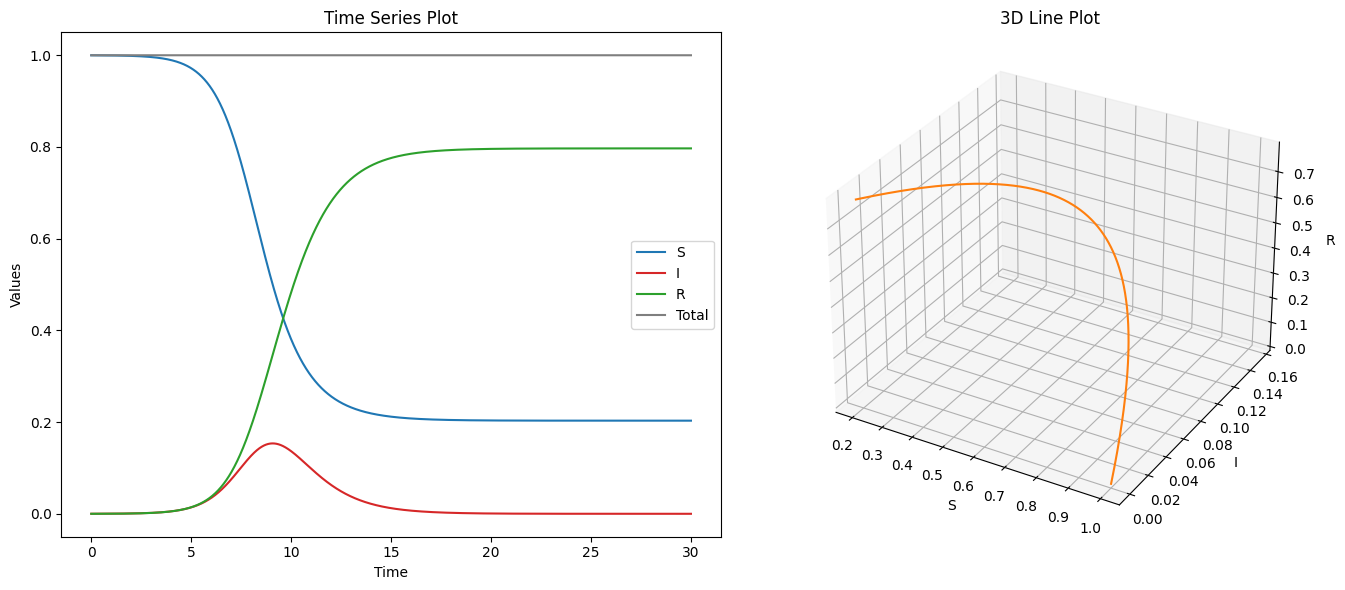

In [83]:
from Capitulo1_metodos import Euler_explicito
I0 = 0.0001; R0 = 0 
S0 = 1-I0;
y0 = (S0,I0,R0)
# Euler
y5, x5 = Euler_explicito(odefun=funsystem5, t_span=(0.0, 30), y0=y0, h=0.001, return_trajectory=True)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Create a figure with 2 subplots: 1 for the time series and 1 for the 3D plot
fig = plt.figure(figsize=(14, 6))

# First subplot (time series)
ax1 = fig.add_subplot(121)  # 1 row, 2 columns, 1st subplot
ax1.plot(x5, y5[:,0], '-', label='S')
ax1.plot(x5, y5[:,1], '-', label='I', color='C03')
ax1.plot(x5, y5[:,2], '-', label='R', color='C02')
ax1.plot(x5, y5[:,0]+y5[:,1]+y5[:,2], '-', label='Total', color='C07')
ax1.set_title('Time Series Plot')
ax1.set_xlabel('Time')
ax1.set_ylabel('Values')
ax1.legend()

# Second subplot (phase plot)
ax2 = fig.add_subplot(122, projection='3d')  # 1 row, 2 columns, 2nd subplot

# Plot the 3D line
ax2.plot(y5[:,0], y5[:,1], y5[:,2], color='C01')

# Set labels
ax2.set_xlabel('S')
ax2.set_ylabel('I')
ax2.set_zlabel('R')

# Set a title
ax2.set_title('3D Line Plot')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the combined figure
plt.show()


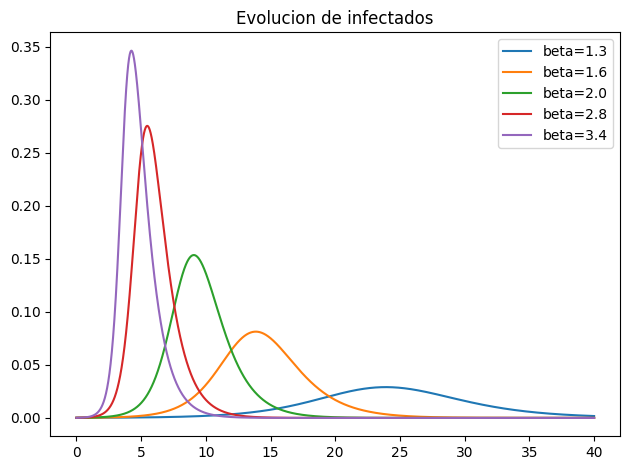

In [92]:
from Capitulo1_metodos import Euler_explicito
I0 = 0.0001; R0 = 0 
S0 = 1-I0;
y0 = (S0,I0,R0)
# Euler
betas = [1.3, 1.6, 2.0, 2.8, 3.4]
for beta in betas:
    odefun = lambda t, y: funsystem5(t,y,beta=beta)
    y5, x5 = Euler_explicito(odefun, t_span=(0.0, 40), y0=y0, h=0.001, return_trajectory=True)

    plt.plot(x5, y5[:,1], '-', label='beta='+str(beta))

plt.title('Evolucion de infectados')
plt.legend()
plt.tight_layout()

# Show the combined figure
plt.show()


---
# Clase 5: Problemas Stiff

### Ejemplo de problema stiff trivial
\begin{equation}
y' = \lambda y, \quad y(0) = 1, \quad \lambda = -20. \quad \mbox{Solucion: } y(x) = \exp(-20 x)
\end{equation}


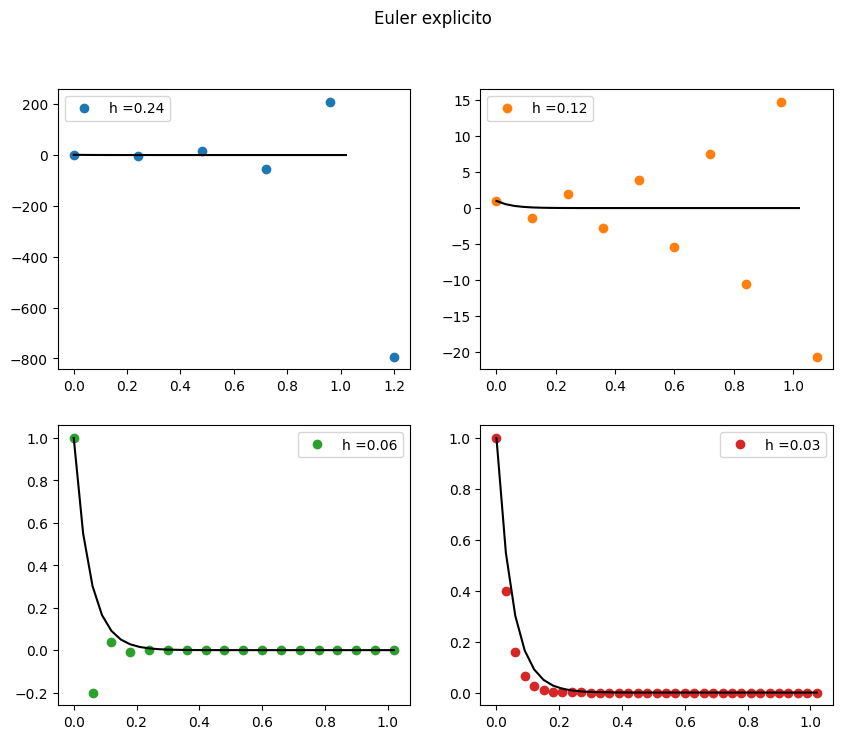

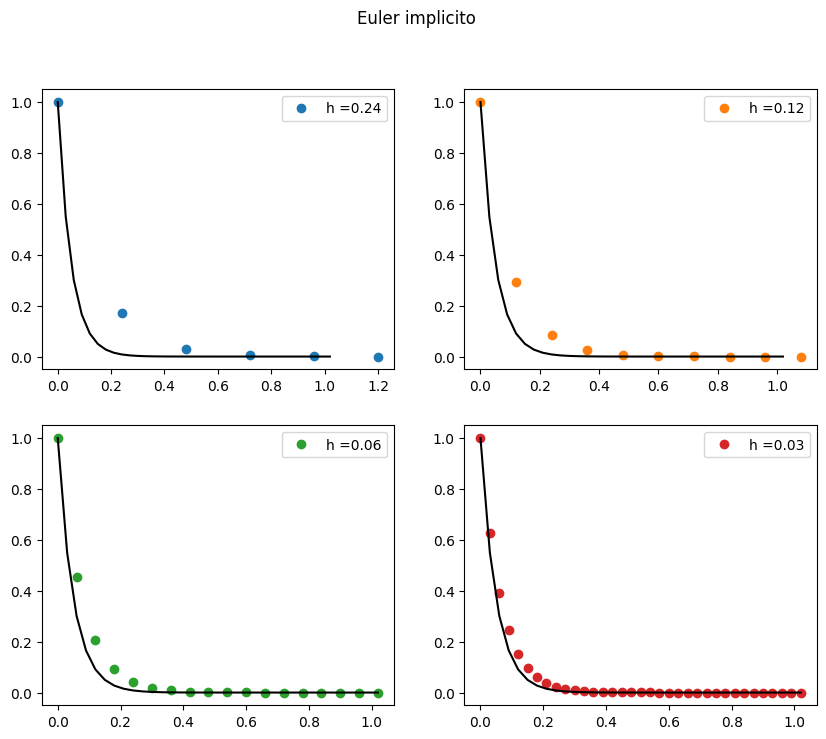

In [85]:
fstiff1 = lambda x,y : -20*y
dfstiff1dy = lambda x,y: -20
y0 = 1
XM = 1
h = [0.24, 0.12, 0.06, 0.03]
N = [int(XM/hi) for hi in h]

yexact = lambda x: np.exp(-20*x)
YH = []
XH = []
YHi = []
# Euler
for i,hi in enumerate(h):
#     yh, xh = Euler_explicito(fstiff1, y0, N=N[i], XM = XM, x0 =0)
#     yhi, xh = Euler_implicito(fstiff1, y0, N=N[i], XM = XM, x0 =0)
    yh, xh = Euler_explicito(odefun=fstiff1, t_span=(0.0, XM), y0=y0, h=h[i], return_trajectory=True)
    yhi, xh = Euler_implicito(odefun=fstiff1, t_span=(0.0, XM), y0=y0, h=h[i], return_trajectory=True, odefunprime=dfstiff1dy)
    YH.append(yh)
    XH.append(xh)
    YHi.append(yhi)

fig, ax = plt.subplots(2,2, figsize=(10,8))
fig.suptitle('Euler explicito')
ax[0,0].plot(XH[0],YH[0], 'o', color='C00',label='h =%.2f'%h[0])
ax[0,0].plot(XH[3], yexact(np.asarray(XH[3])),'k')
ax[0,0].legend()
ax[0,1].plot(XH[1],YH[1], 'o', color='C01',label='h =%.2f'%h[1])
ax[0,1].plot(XH[3], yexact(np.asarray(XH[3])),'k')
ax[0,1].legend()
ax[1,0].plot(XH[2],YH[2], 'o', color='C02',label='h =%.2f'%h[2])
ax[1,0].plot(XH[3], yexact(np.asarray(XH[3])),'k')
ax[1,0].legend()
ax[1,1].plot(XH[3],YH[3], 'o', color='C03',label='h =%.2f'%h[3])
ax[1,1].plot(XH[3], yexact(np.asarray(XH[3])),'k')
ax[1,1].legend()
plt.show()

figi, axi = plt.subplots(2,2, figsize=(10,8))
figi.suptitle('Euler implicito')
axi[0,0].plot(XH[0],YHi[0], 'o', color='C00',label='h =%.2f'%h[0])
axi[0,0].plot(XH[3], yexact(np.asarray(XH[3])),'k')
axi[0,0].legend()
axi[0,1].plot(XH[1],YHi[1], 'o', color='C01',label='h =%.2f'%h[1])
axi[0,1].plot(XH[3], yexact(np.asarray(XH[3])),'k')
axi[0,1].legend()
axi[1,0].plot(XH[2],YHi[2], 'o', color='C02',label='h =%.2f'%h[2])
axi[1,0].plot(XH[3], yexact(np.asarray(XH[3])),'k')
axi[1,0].legend()
axi[1,1].plot(XH[3],YHi[3], 'o', color='C03',label='h =%.2f'%h[3])
axi[1,1].plot(XH[3], yexact(np.asarray(XH[3])),'k')
axi[1,1].legend()
plt.show()


### Ejemplo de problema stiff sistema
\begin{equation}
y' = A y, \quad y(0) = \begin{bmatrix} 1 \\4 \end{bmatrix}, \quad 
A= 
\begin{bmatrix}
-8003 & 1999 \\
23988 & -6004 
\end{bmatrix}.
 \quad \mbox{Solucion: } y(x) = \begin{bmatrix}\exp(-7 x) \\ 4 \exp(-7x)\end{bmatrix}
\end{equation}


In [86]:
A = np.array([[-8003, 1999],[23988, -6004]], dtype=np.float64)
eigenvaluesA, eigenvectorsA = np.linalg.eig(A)
print(eigenvaluesA)

[-1.4e+04 -7.0e+00]


In [109]:
Fstiff1 = lambda x, Y: A.dot(Y)
dFstiff1dy = lambda x, Y: A 

Y0 = np.array([1.0,4.0], dtype=np.float64)
XM = 0.08
# XM= 0.008
h = [0.004]
N = [20]

Yexact = lambda x: np.array([np.exp(-7*x), 4*np.exp(-7*x)])
YH = []
XH = []
YHi = []
# Euler
for i,hi in enumerate(h):
#     yh, xh = Euler_explicito_multivariate(Fstiff1, Y0, N=N[i], XM = XM, x0 =0)
    yh, xh = Euler_explicito(odefun=Fstiff1, t_span=(0.0, XM), y0=Y0, h=h[i], return_trajectory=True)
    yhi, xh = Euler_implicito_multivariate(Fstiff1, Y0, N=N[i], XM = XM, x0 =0,dfdy = dFstiff1dy)
#     yhi, xh = Euler_implicito(odefun=Fstiff1, t_span=(0.0, XM), y0=Y0, h=h[i], return_trajectory=True)#, odefunprime=dFstiff1dy)

    YH.append(yh)
    XH.append(xh)
    YHi.append(yhi)

df = pd.DataFrame({'x': xh, 'y_1':[Yexact(xhi)[0] for xhi in xh], 'Euler Explicito':np.asarray(yh)[:,0], 'Euler implicito':np.asarray(yhi)[:,0]})
df

,x,y_1,Euler Explicito,Euler implicito
0,0.000,1.000000,1.000000e+00,1.000000
1,0.004,0.972388,9.720000e-01,0.972763
2,0.008,0.945539,9.447840e-01,0.946267
3,0.012,0.919431,9.183300e-01,0.920493
4,0.016,0.894044,8.926168e-01,0.895422
5,0.020,0.869358,8.676235e-01,0.871033
6,0.024,0.845354,8.433301e-01,0.847308
7,0.028,0.822012,8.197168e-01,0.824230
8,0.032,0.799315,7.967648e-01,0.801780
9,0.036,0.777245,7.744553e-01,0.779941


In [10]:
def Euler_explicito_multivariate(f, y0, N, XM, x0=0):
    h = (XM- x0)/N
    yn = y0.copy()
    x = []
    y = []
    x.append(x0)
    y.append(y0)
    xn = x0

    for n in range(1,N+1):
        yn = yn + h * f(xn,yn)
        xn = x0+h*n
        x.append(xn)
        y.append(yn)
    return y, x
def Euler_implicito_multivariate(f, y0, N, XM, x0=0, dfdy=None):
    h = (XM- x0)/N
    yn = y0
    x = []
    y = []
    x.append(x0)
    y.append(y0)
    xn = x0
    
    if np.isscalar(y0):
        I = 1.0
    else:
        I = np.eye(y0.size)
    for n in range(1,N+1):
        F = lambda y: np.array([y[0] - yn[0] - h*f(xn+h,y)[0], y[1] - yn[1] - h*f(xn+h,y)[1]])
        if dfdy is None:
            Fprime = None
        else:
            Fprime = lambda y: I - h*dfdy(xn+h,y)
        yn,_ = newton_multivariate(F, X0=yn+h*f(xn,yn), Fprime=Fprime)
        xn = x0+h*n
        x.append(xn)
        y.append(yn)
    return y, x
def newton_multivariate(F, X0, Fprime, maxiter=50, tol=1e-8):
    i = 0
    error = 1.0
    X = X0
    
    while np.any(abs(error)>tol) and i <maxiter:
        funeval = F(X)
        Jac = Fprime(X)
        Xnew = X - np.linalg.solve(Jac, funeval)
        error = Xnew-X
        X = Xnew
        i += 1
    return X, F(X)

In [99]:
def plot_stability_region_multistep(a,b, xinter=[-3,0.5], yinter=[-3,3]):
    
    #a : coefficients

    nx, ny = (100, 200)
    x = np.linspace(xinter[0], xinter[1], nx)
    y = np.linspace(yinter[0], yinter[1], ny)
    xv, yv = np.meshgrid(x, y)
    A = np.zeros((nx,ny))
    for i in range(nx):
        for j in range(ny):
            z = x[i] +1j*y[j]
            ceval = [evalcoeff(z,a[k],b[k]) for k in range(len(a))]
            Z = np.roots(np.flip(np.asarray(ceval)))
            if np.any(np.abs(Z)>1):
                A[i,j] = -1 # no estable
            else:
                A[i,j] = 1
    plt.contourf(x, y, A.T, cmap='bone')
    return A
def evalcoeff(z,ak,bk):
    return ak -z*bk

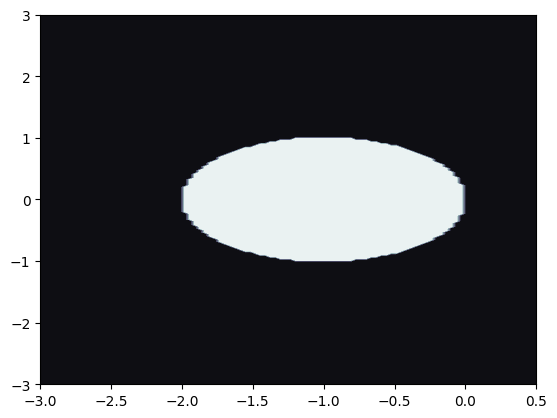

In [100]:
# Euler explicito
a = [-1.0,1.0]
b = [1.0,.0]
A_eulerimplicito = plot_stability_region_multistep(a,b)


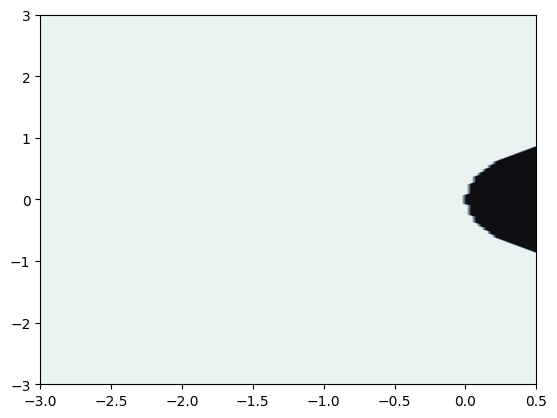

In [101]:
# Euler implicito
a = [-1.0,1.0]
b = [0,1.0]
A_implicito = plot_stability_region_multistep(a,b)

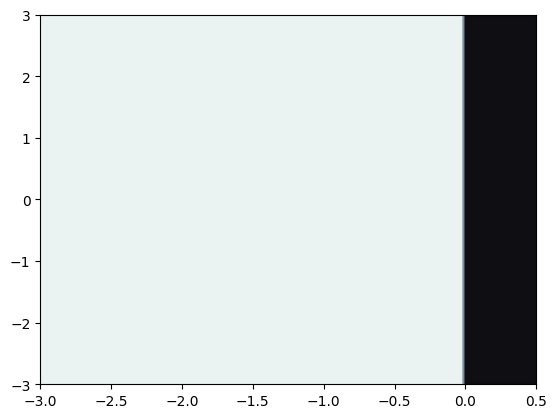

In [102]:
# trapezoidal
a = [-1.0,1.0]
b = [1.0/2.0,1.0/2.0]
A_trap = plot_stability_region_multistep(a,b)

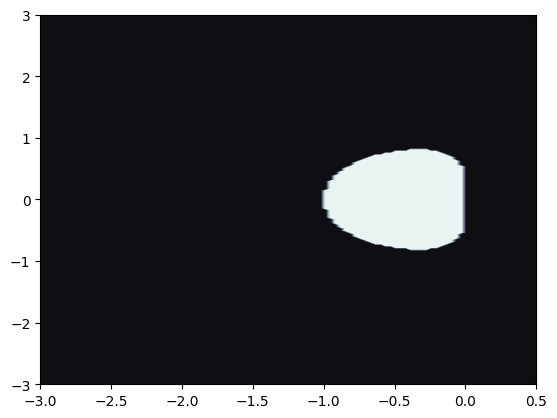

In [103]:
# A-B2
a = [0,-1.0,1.0]
b = [-1.0/2.0,3.0/2.0,0]
A_AB2 = plot_stability_region_multistep(a,b)

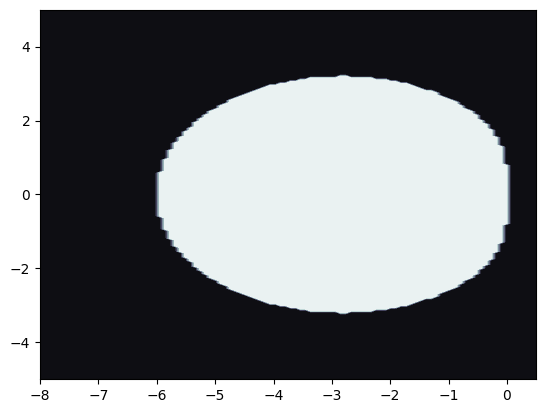

In [104]:
# A-M2
a = [0,-1.0,1.0]
b = [-1.0/12.0,2.0/3.0,5.0/12.0]
A_AM2 = plot_stability_region_multistep(a,b,xinter=[-8,0.5], yinter=[-5,5])

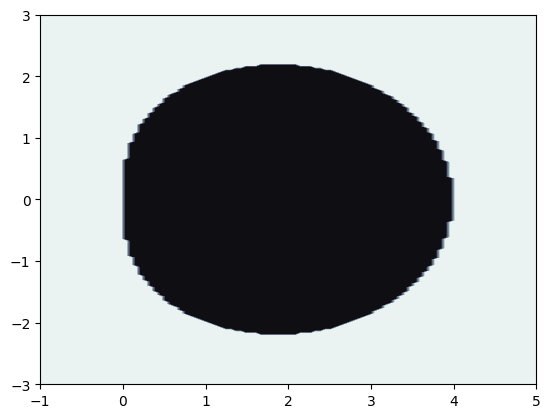

In [105]:
# BDF2 
a = [1,-4.0,3.0]
b = [0,0,2]
A_BDF2 = plot_stability_region_multistep(a,b,xinter=[-1,5], yinter=[-3,3])

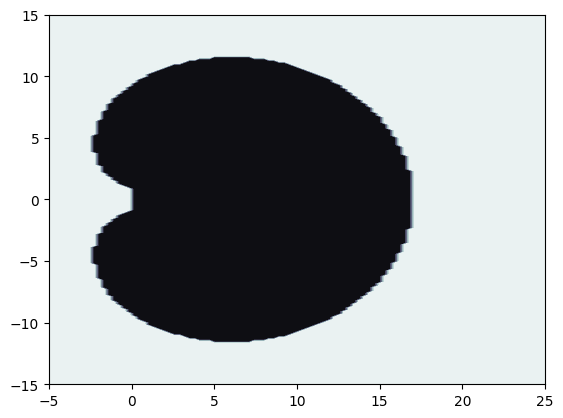

In [106]:
# BDF5 
a = [-12, 75,-200,300,-300,137]
b = [0,0,0,0,0,60]
A_BDF5 = plot_stability_region_multistep(a,b,xinter=[-5,25], yinter=[-15,15])

## Otro Ejemplo de sistema stiff

In [6]:
L = np.array([[-100.0,1.0],[0,-0.1]])
V = np.array([[1.0,1.0],[0,99.9]])
D = np.array([[-100.0,0.0],[0,-0.1]])
print(np.linalg.inv(V))
print(L-V@D@np.linalg.inv(V))

[[ 1.         -0.01001001]
 [ 0.          0.01001001]]
[[0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.38777878e-17]]


c:\users\manuel sánchez\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # Remove the CWD from sys.path while we load stuff.


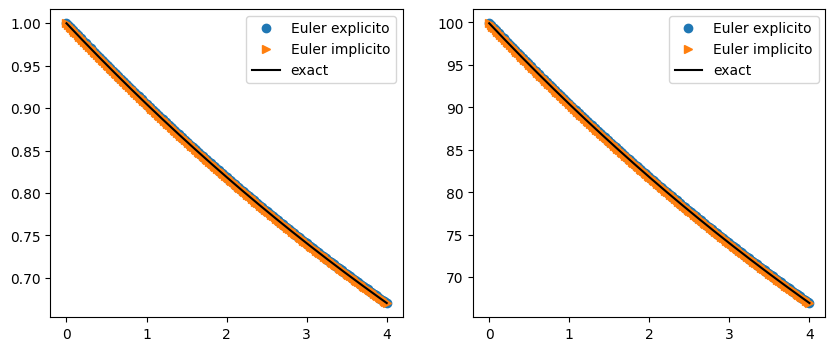

In [43]:
Fstiff2 = lambda x, Y: L.dot(Y)
dFstiff2dy = lambda x, Y: L 

Y0 = np.array([1.0,99.9], dtype=np.float64)

h = 0.02
N = 200
XM = h*N

Yexact = lambda x: V@np.array([[np.exp(-100*x),0],[0, np.exp(-0.1*x)]])@np.linalg.solve(V,Y0)
YH = []
XH = []
YHi = []
# Euler
yh, xh = Euler_explicito(odefun=Fstiff2, t_span=(0.0, XM), y0=Y0, h=h, return_trajectory=True)
yhi, xh = Euler_implicito_multivariate(Fstiff2, Y0, N=N, XM = XM, x0 =0,dfdy = dFstiff2dy)

YH.append(yh)
XH.append(xh)
YHi.append(yhi)

# df = pd.DataFrame({'x': xh, 'y_1':[Yexact(xhi)[0] for xhi in xh], 'Euler Explicito':np.asarray(yh)[:,0], 'Euler implicito':np.asarray(yhi)[:,0]})
# df

fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(xh, yh[:,0], 'o', color='C00',label='Euler explicito')
ax[0].plot(xh, np.array(yhi)[:,0], '>',color='C01', label='Euler implicito')
xplot = np.linspace(0,XM, 200)
ax[0].plot(xplot, Yexact(xplot)[0], color='k', label='exact')
ax[0].legend()

ax[1].plot(xh, yh[:,1], 'o', color='C00',label='Euler explicito')
ax[1].plot(xh, np.array(yhi)[:,1], '>',color='C01', label='Euler implicito')
xplot = np.linspace(0,XM, 200)
ax[1].plot(xplot, Yexact(xplot)[1], color='k', label='exact')
ax[1].legend()
plt.show()